In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Trực quan hoá phân bố của biến mục tiêu và các đặc trưng dùng cho việc dự đoán của tập train

#### Biến mục tiêu

In [2]:
arsenal_df = pd.read_csv("../../feature_engineering_data/train/arsenal.csv")
test_df = pd.read_csv("../../feature_engineering_data/test/arsenal.csv")

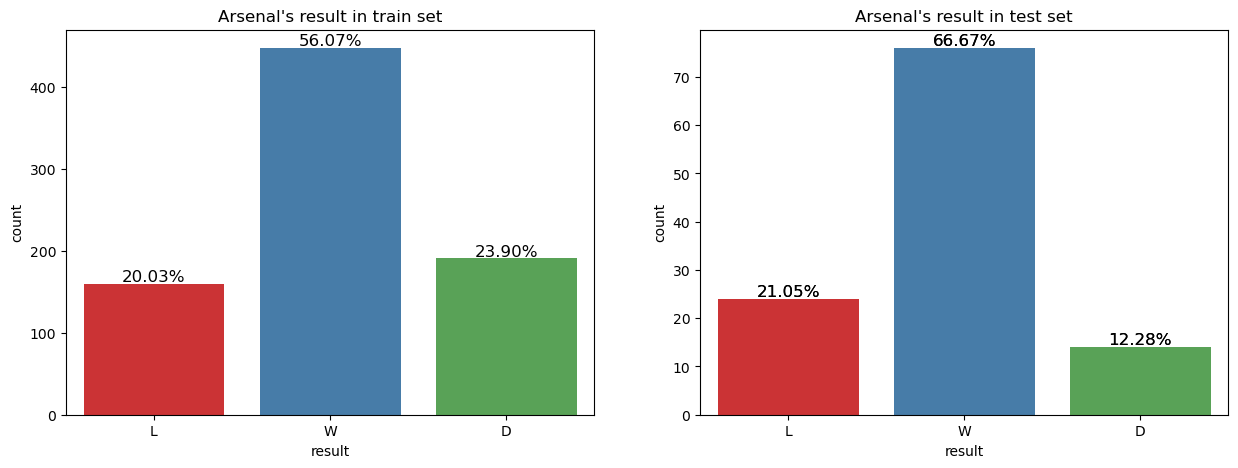

In [3]:
train_percentages = arsenal_df['result'].value_counts(normalize=True) * 100
test_percentages = test_df['result'].value_counts(normalize=True) * 100

# Vẽ chung biểu đồ cho cả tập train và tập test
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x="result", data=arsenal_df, palette="Set1", hue="result", ax=ax[0]);
ax[0].set_title("Arsenal's result in train set")

sns.countplot(x="result", data=test_df, palette="Set1", hue="result", ax=ax[1]);
ax[1].set_title("Arsenal's result in test set")

# Thêm tỷ lệ phần trăm vào các cột của biểu đồ huấn luyện
for p in ax[0].patches:
    height = p.get_height()
    ax[0].annotate(f'{height / len(arsenal_df) * 100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                   ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                   textcoords='offset points')

# Biểu đồ cho tập kiểm thử
sns.countplot(x="result", data=test_df, palette="Set1", hue="result", ax=ax[1])
ax[1].set_title("Arsenal's result in test set")

# Thêm tỷ lệ phần trăm vào các cột của biểu đồ kiểm thử
for p in ax[1].patches:
    height = p.get_height()
    ax[1].annotate(f'{height / len(test_df) * 100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                   ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                   textcoords='offset points')


#### Các feature quan trọng

#### 1. Các biến Numerical

In [4]:
# Xác định các numerical_col
numerical_cols = arsenal_df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols

Index(['win_percent_before_team1', 'lose_percent_before_team1',
       'draw_percent_before_team1', 'win_percent_before_team2',
       'lose_percent_before_team2', 'draw_percent_before_team2',
       'total_goals_before_team1', 'total_lost_goals_before_team1',
       'total_goals_before_team2', 'total_lost_goals_before_team2',
       'ELO_before_match_team1', 'ELO_before_match_team2',
       'ELO_after_match_team1', 'ELO_after_match_team2',
       'average_score_before_match_team1', 'average_score_before_match_team2',
       'head2head_win_percent', 'head2head_draw_percent',
       'head2head_lost_percent', 'is_opponent_big6'],
      dtype='object')

In [17]:
important_columns = [
    "win_percent_before_team2",
    "lose_percent_before_team2",
    "head2head_win_percent",
    "head2head_draw_percent",
    "head2head_lost_percent",
    "ELO_before_match_team2",
    "average_score_before_match_team2",    
]

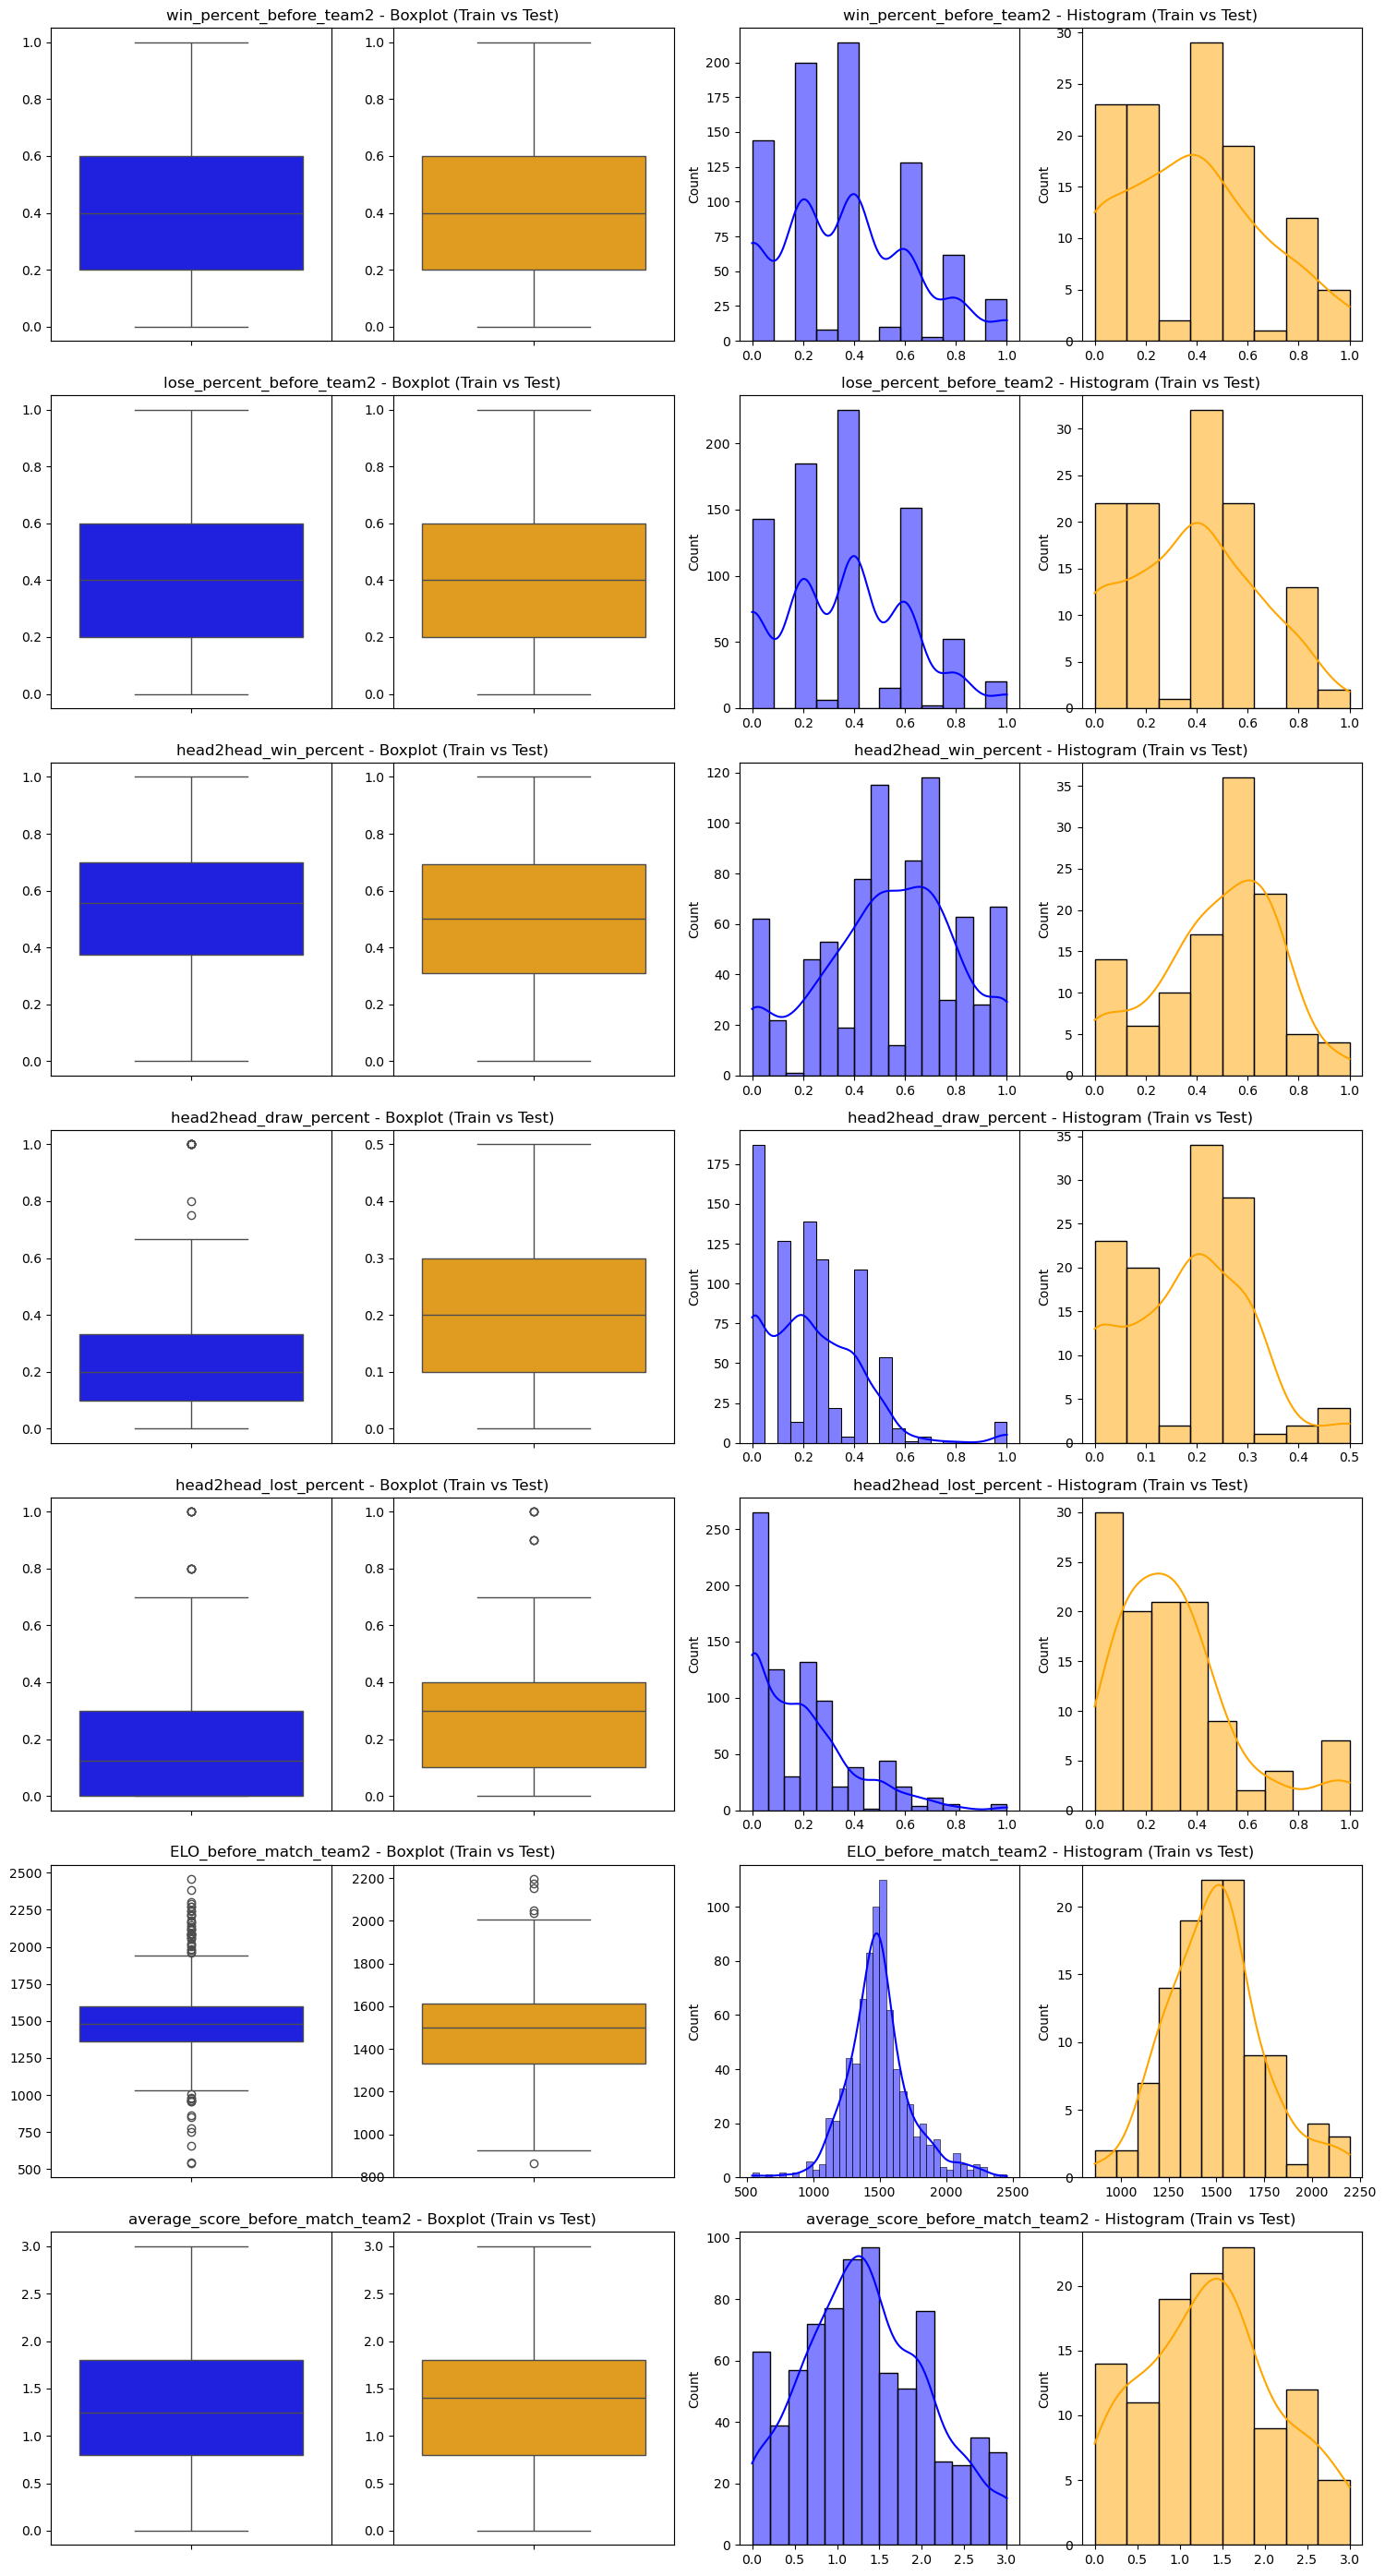

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tính toán số hàng và cột dựa trên số lượng cột quan trọng
n_cols = 2  # Mỗi cột chính sẽ chứa 2 biểu đồ (boxplot và histogram)
n_rows = len(important_columns)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))

# Vẽ boxplot và histogram cho từng cột trong important_columns
for i, column in enumerate(important_columns):
    # Tạo đồ thị chính cho boxplot
    boxplot_ax = axes[i, 0]
    # Tạo trục con cho boxplot
    inset_boxplot_train = boxplot_ax.inset_axes([0, 0, 0.45, 1])  # [x0, y0, width, height]
    inset_boxplot_test = boxplot_ax.inset_axes([0.55, 0, 0.45, 1])
    
    sns.boxplot(data=arsenal_df, y=column, ax=inset_boxplot_train, color='blue').set_ylabel('')
    sns.boxplot(data=test_df, y=column, ax=inset_boxplot_test, color='orange').set_ylabel('')

    boxplot_ax.set_title(f'{column} - Boxplot (Train vs Test)')
    boxplot_ax.set_xticks([])  # Ẩn trục x chính
    boxplot_ax.set_yticks([])  # Ẩn trục y chính
    
    # Tạo đồ thị chính cho histogram
    hist_ax = axes[i, 1]
    # Tạo trục con cho histogram
    inset_hist_train = hist_ax.inset_axes([0, 0, 0.45, 1])
    inset_hist_test = hist_ax.inset_axes([0.55, 0, 0.45, 1])
    
    sns.histplot(data=arsenal_df, x=column, kde=True, ax=inset_hist_train, color='blue').set_xlabel('')
    sns.histplot(data=test_df, x=column, kde=True, ax=inset_hist_test, color='orange').set_xlabel('')
    
    hist_ax.set_title(f'{column} - Histogram (Train vs Test)')
    hist_ax.set_xticks([])  # Ẩn trục x chính
    hist_ax.set_yticks([])  # Ẩn trục y chính

# Điều chỉnh bố cục để không bị trùng lặp giữa các biểu đồ
plt.tight_layout()
plt.show()

#### 2. Các biến Categorical

#### venue

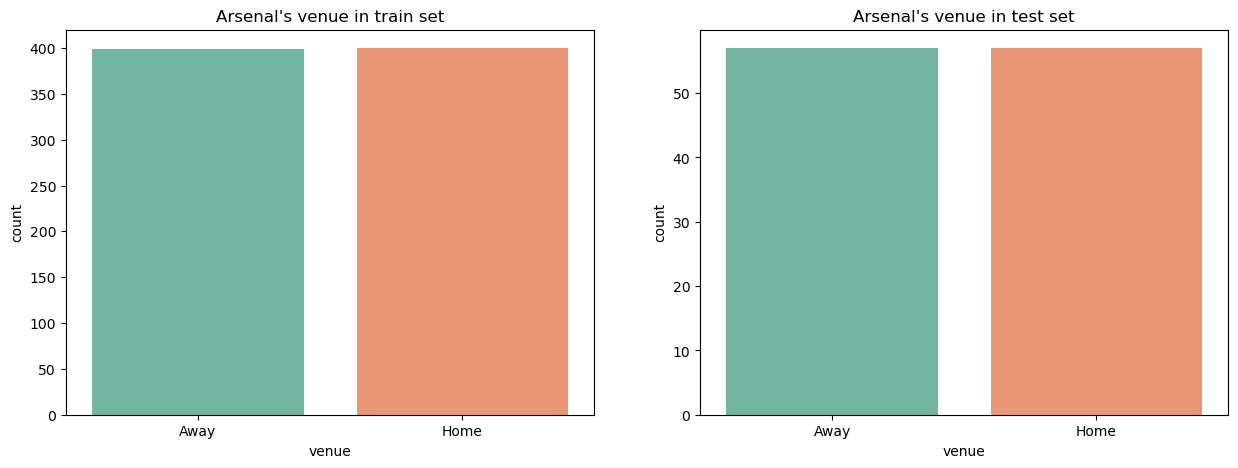

In [7]:
# Vẽ phân bố venue trên cả tập train và tập test
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.countplot(x="venue", data=arsenal_df, palette="Set2", hue="venue", ax=axes[0])
axes[0].set_title("Arsenal's venue in train set")

sns.countplot(x="venue", data=test_df, palette="Set2", hue="venue", ax=axes[1])
axes[1].set_title("Arsenal's venue in test set");


#### is_opponent_big6

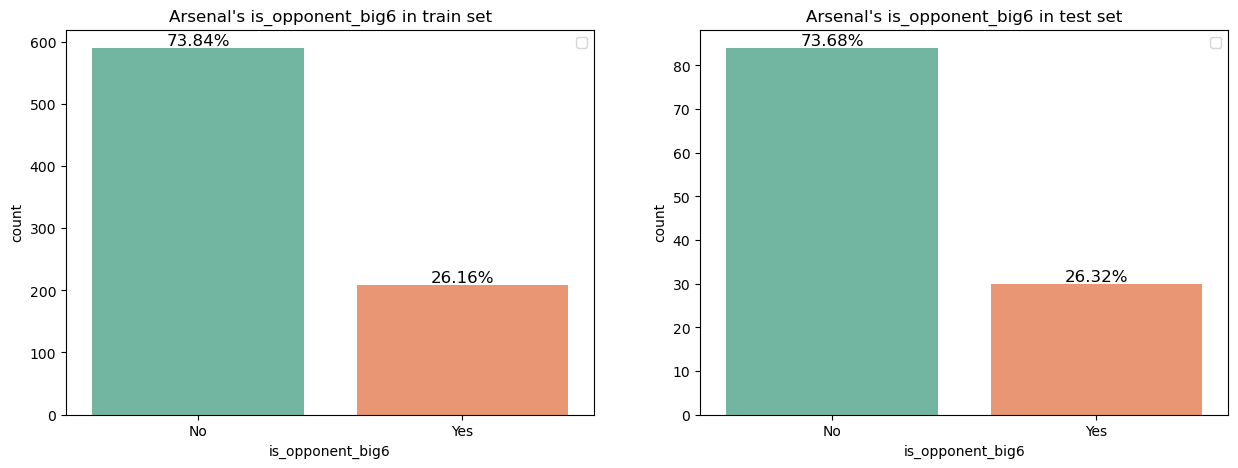

In [8]:
# Vẽ phân bố venue trên cả tập train và tập test
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.countplot(x="is_opponent_big6", data=arsenal_df, palette="Set2", hue="is_opponent_big6", ax=axes[0])
axes[0].set_title("Arsenal's is_opponent_big6 in train set")
axes[0].set_xticks([0, 1], ["No", "Yes"])

sns.countplot(x="is_opponent_big6", data=test_df, palette="Set2", hue="is_opponent_big6", ax=axes[1])
axes[1].set_title("Arsenal's is_opponent_big6 in test set");
axes[1].set_xticks([0, 1], ["No", "Yes"])

axes[0].legend([]);
axes[1].legend([]);

# Vẽ % của từng cột
for p in axes[0].patches:
    height = p.get_height()
    if height == 0:
        continue
    axes[0].annotate(f'{height / len(arsenal_df) * 100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                     textcoords='offset points')
    
for p in axes[1].patches:
    height = p.get_height()
    if height == 0:
        continue
    axes[1].annotate(f'{height / len(test_df) * 100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                     textcoords='offset points')
